In [1]:
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import time
%matplotlib inline
import scipy


You get lognormals when you’re in a vigorously chaotic part of phase space where everything gets well mixed and uncorrelated, AND you have enough Lyapunov (I.e., chaotic, or decor relation timescales). If you have too few timescales you don’t have the change to average out and make a nice distribution. On the other extreme, if you’re not chaotic enough, then there could be strong correlations that prevent you from mixing effectively, and only a few by chance find their way to a much more chaotic part of phase space and go unstable.

Maybe we’re seeing that with the solar system? You need to go to long instability timescales to have enough kicks to average over, and the timescales are 10^4-10^5 years, so you need to go out to e.g. 10^6-10^7. But when you go to low eccentricities in the well spaced solar system you quickly get into pretty stable areas.



1)chaotic phase space,    2)long length of integration


a) 1 and 2, nice distribution

b) 1 and !2, exp? dist since everything collides at the same time, not enough time to become unmixed and uncorrelated

c) !1 and 2, very stable system

d) !1 and !2, very stable, if its stable, the length of integration doesn't really matter

solar_1.3_1e9_200.csv
solar_1.35_1e9_200.csv
solar_1.4_1e9_200.csv
solar_1.45_1e9_200.csv
solar_1.5_1e9_200.csv
solar_1.55_1e9_200.csv
solar_1.6_1e9_200.csv
solar_1.65_1e9_200.csv
solar_1.7_1e9_200.csv
solar_1.75_1e9_200.csv
solar_1.8_1e9_200.csv
solar_1.85_1e9_200.csv
solar_1.9_1e9_200.csv
solar_1.95_1e9_200.csv
solar_2_1e9_1000.csv
solar_2.5_1e9_1000.csv
solar_3_1e9_1000.csv
solar_3.5_1e9_1000.csv
solar_4_1e9_1000.csv


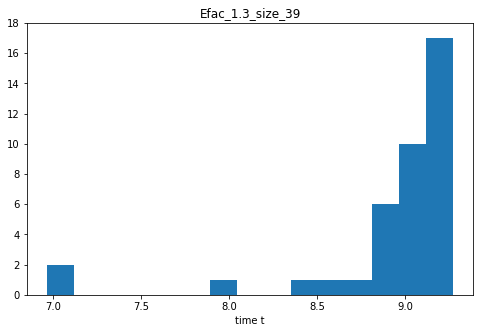

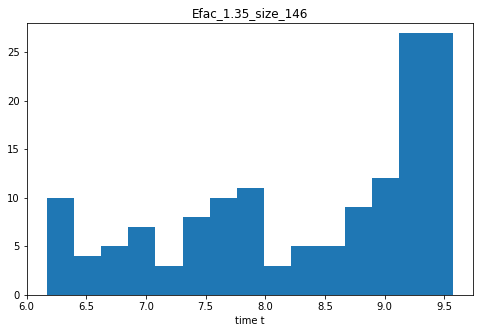

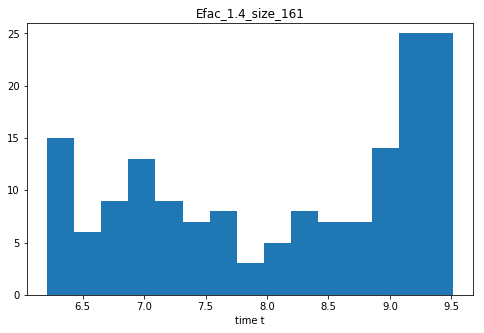

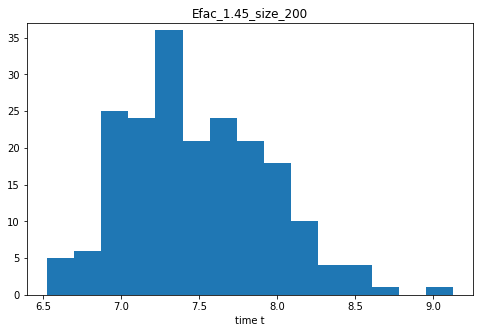

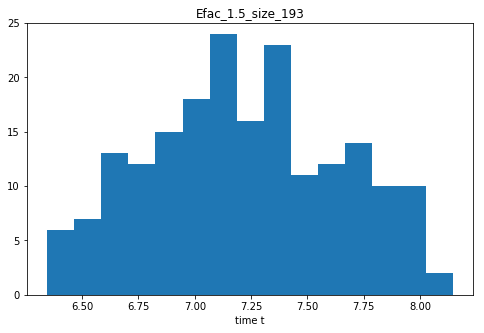

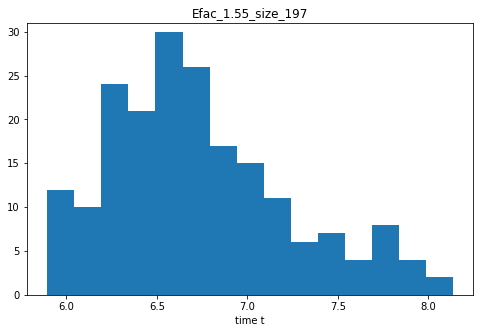

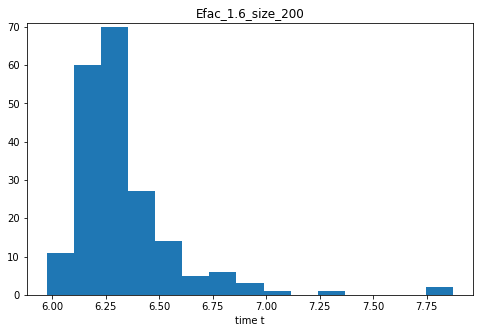

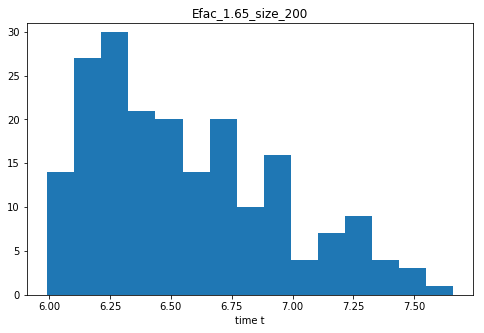

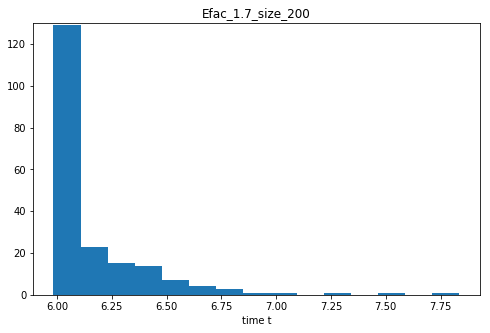

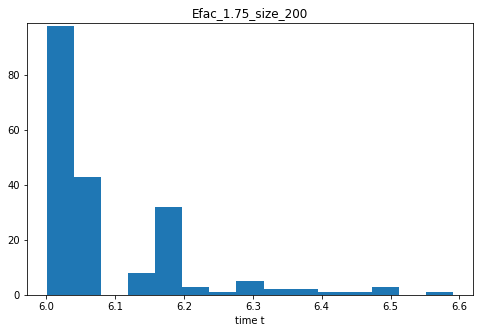

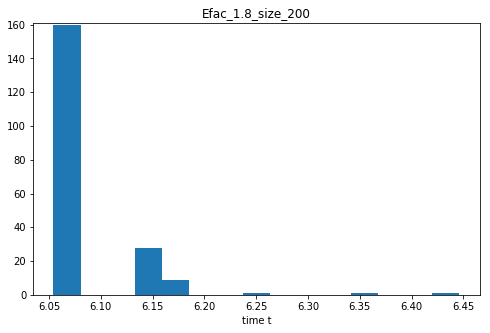

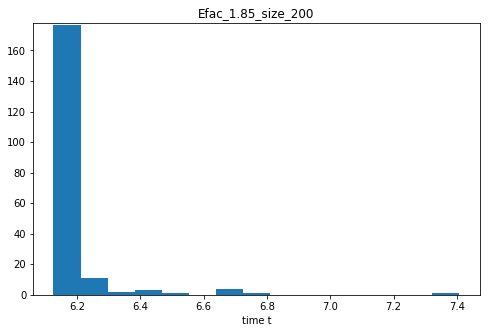

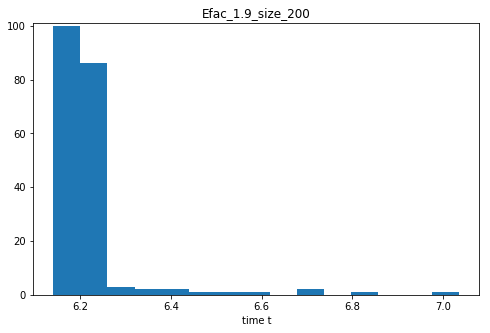

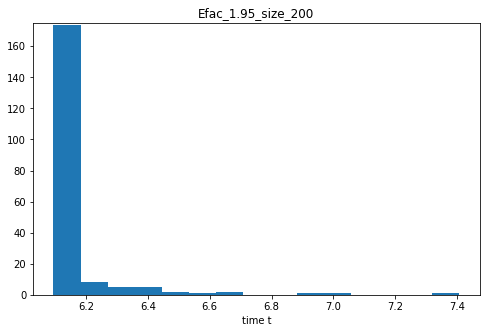

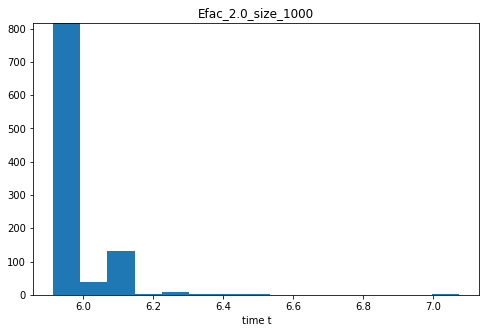

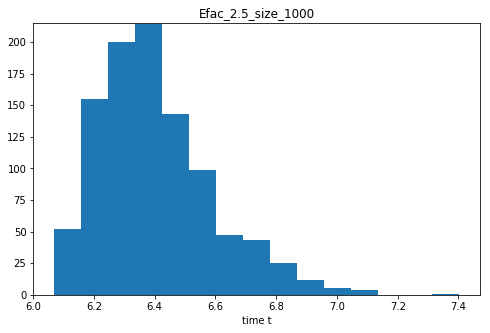

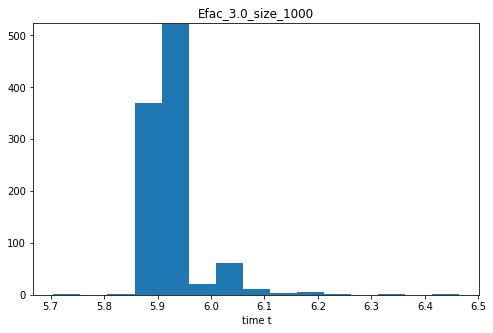

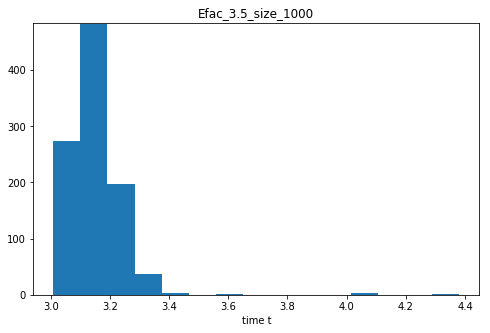

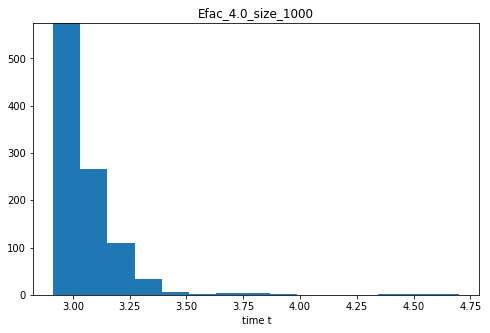

In [9]:
data = np.loadtxt("../../csvs/Solar_feats/Order.txt", dtype = str)
means = np.zeros(data.shape[0])
efac = np.zeros_like(means)
for i, name in enumerate(data[1:]):
    #print name
    
    times = pd.read_csv("../../csvs/Solar_feats/" + name, index_col=0)
    print(name)
    
    try:
        del times["Unnamed: 0.1"]
    except:
        pass
    
    #times = times[times["t"]!= np.nan]
    vals = times["t"].values
    vals = np.nan_to_num(vals)
    vals = vals[np.where(vals !=0)[0]]
    if vals.shape[0] ==0:
        continue
    vals = vals/2./np.pi
    vals = np.log10(vals)
    fig, ax = plt.subplots(1, figsize  = (8, 5))
    #ax.set_title(name)
    ax.set_xlabel("time t")
    n, bins, patches =  ax.hist(vals, bins = 15)
    
    #weibull hist fits
    """
    gamma_out, loc_out, alpha_out = stats.weibull_min.fit(vals)#, f0=a_in,floc=loc_in)
    print "Params", gamma_out, loc_out, alpha_out, "Tmin", vals.min(), "Tmax", vals.max()#, f0=a_in,floc=loc_in)
    means[i] = loc_out + alpha_out*scipy.special.gamma(1.+1./gamma_out)
    #print loc_out, alpha_out*scipy.special.gamma(1.+1./gamma_out)
    efac[i] = float(name.split("_")[1])
    x = np.linspace(vals.min(), vals.max(), 100)
    ax.set_title("Efac_{0}_size_{1}".format(efac[i],vals.shape[0]) )
    
    weib_vals = stats.weibull_min.pdf(x, c=gamma_out,loc=loc_out,scale = alpha_out)
    
    ax.plot(x, weib_vals*n.max())
    
    """
    #print name, efac
    efac[i] = float(name.split("_")[1])
    ax.set_title("Efac_{0}_size_{1}".format(efac[i],vals.shape[0]) )
    max_val = n.max()
    ax.set_ylim([0,max_val +1])
    #fig.savefig("../../Figures/Solar_Figures/Solar_efac{0}.png".format(efac[i]), bbox_inches = "tight")
    #break

Text(0,0.5,u'Instability Expected Value')

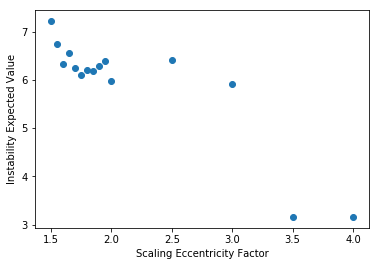

In [39]:
plt.scatter(efac, means)
plt.xlabel("Scaling Eccentricity Factor")
plt.ylabel("Instability Expected Value") 
#note this is not the loc parameter, though its a resonally decent apprximation
#plt.savefig("../../Figures/Solar_Figures/EXP_val_vs_efac.png", bbox_inches = "tight")

solar_1.5_1e9_1000.csv
Params 2.8482071023713167 6.112492844433795 1.2423926203090954 Tmin 6.345026391349815 Tmax 8.146770092312863
solar_1.55_1e9_1000.csv
Params 1.846258917016262 5.845221483886835 1.005582733189128 Tmin 5.8938227758586414 Tmax 8.137825094690733
solar_1.6_1e9_1000.csv
Params 1.546036905210991 5.96946631599881 0.39812493517664216 Tmin 5.975216372584422 Tmax 7.872474664536094
solar_1.65_1e9_1000.csv
Params 1.520326585011278 5.983806018967635 0.6416308378650485 Tmin 5.992215317655096 Tmax 7.659043412579436
solar_1.7_1e9_1000.csv
Params 0.8954113080323725 5.9839991924181595 0.24275683298542639 Tmin 5.98399919241816 Tmax 7.835434204815103
solar_1.75_1e9_1000.csv
Params 0.8865092562791757 6.001246881927052 0.08431011035649391 Tmin 6.001246881927053 Tmax 6.590647100683456
solar_1.8_1e9_1000.csv
Params 0.5309221882729301 6.05428189991718 0.08329605551051628 Tmin 6.054281899917181 Tmax 6.4460711013802765
solar_1.85_1e9_1000.csv
Params 0.7707858625843294 6.126004971664129 0.043

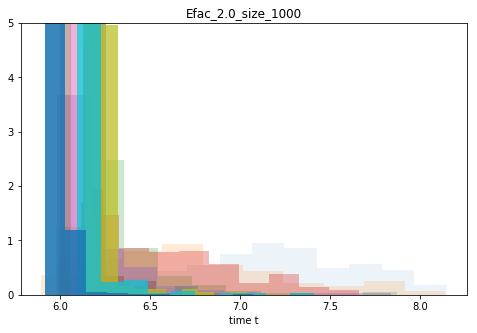

In [48]:
fig, ax = plt.subplots(1, figsize  = (8, 5))

for i, name in enumerate(data[:-4]):
    print name
    
    times = pd.read_csv("../../csvs/Solar_feats/" + name, index_col=0)
    del times["Unnamed: 0.1"]
    #times = times[times["t"]!= np.nan]
    vals = times["t"].values
    vals = np.nan_to_num(vals)
    vals = vals[np.where(vals !=0)[0]]
    vals = vals/2./np.pi
    vals = np.log10(vals)
    #ax.set_title(name)
    ax.set_xlabel("time t")
    n, bins, patches =  ax.hist(vals, normed=1, bins = 10, alpha= (i+1)*0.08)
    
    #weibull hist fits
    gamma_out, loc_out, alpha_out = stats.weibull_min.fit(vals)#, f0=a_in,floc=loc_in)
    print "Params", gamma_out, loc_out, alpha_out, "Tmin", vals.min(), "Tmax", vals.max()#, f0=a_in,floc=loc_in)
    #print loc_out, alpha_out*scipy.special.gamma(1.+1./gamma_out)
    x = np.linspace(vals.min(), vals.max(), 100)
    ax.set_title("Efac_{0}_size_{1}".format(efac[i],vals.shape[0]) )

    #weib_vals = stats.weibull_min.pdf(x, c=gamma_out,loc=loc_out,scale = alpha_out)
    
    #ax.plot(x, weib_vals)
    max_val = n.max()
    ax.set_ylim([0,5])
    #fig.savefig("../../Figures/Solar_Figures/Solar_efac{0}.png".format(efac[i]), bbox_inches = "tight")
    #break